# 1. Problem Statement
 
Students are expected to identify a classification / regression problem of your choice. You have to detail the problem under this heading which basically addresses the following questions.
 
   1. What is the problem that you are trying to solve?
   2. What kind of prediction (classification / regression) task are you performing?

ENSURE THAT YOU ARE USING NUMERICAL / CATEGORICAL DATA only.

DO NOT use images or textual data.

Score: 1 Mark in total (0.5 mark each)

--------------Type the answers below this line-------------- 
1. What is the problem that you are trying to solve? <br>
We are trying to come up with a model that will be able to predict the amount a customer would be willing to spend on the purchase of a car given the following characteristics:
customer name, customer email, country, gender, age, annual salary, credit card debt and net worth

2. What kind of prediction (classification / regression) task are you performing? <br>
The task in hand is a regression problem where the model is expected to estimate the amount spent by a customer for a car based on few characteristics. 

In [1]:
# !pip install mlxtend
# !pip install tensorflow
from mlxtend.plotting import plot_decision_regions
import tensorflow as tf

# 2. Data Acquisition
 
For the problem identified by you, students have to find the data source themselves from any data source.

## 2.1 Download the data directly



In [157]:
##---------Type the code below this line------------------##
import pandas as pd

dataset = pd.read_csv("car_purchasing.csv")

print("Dimension of data set :" , dataset.shape)
print(" Car Purchase data ",dataset)

Dimension of data set : (500, 9)
 Car Purchase data         customer name                                     customer email  \
0      Martina Avila  cubilia.Curae.Phasellus@quisaccumsanconvallis.edu   
1      Harlan Barnes                                eu.dolor@diam.co.uk   
2    Naomi Rodriquez  vulputate.mauris.sagittis@ametconsectetueradip...   
3    Jade Cunningham                            malesuada@dignissim.com   
4       Cedric Leach     felis.ullamcorper.viverra@egetmollislectus.net   
..               ...                                                ...   
495           Walter                                ligula@Cumsociis.ca   
496            Vanna                 Cum.sociis.natoque@Sedmolestie.edu   
497            Pearl                      penatibus.et@massanonante.com   
498             Nell                  Quisque.varius@arcuVivamussit.net   
499            Marla                          Camaron.marla@hotmail.com   

          country  gender        age  annual S

## 2.2 Code for converting the above downloaded data into a form suitable for DL 

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer email       500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [69]:
dataset.shape

(500, 9)

In [70]:
## Check the data by displaying first 5 records

dataset.head()

,customer name,customer email,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [71]:
## Check the correlation between the columns with "car purchase amount"

dataset.corr()[["car purchase amount"]].sort_values(["car purchase amount"])

,car purchase amount
gender,-0.066408
credit card debt,0.028882
net worth,0.488580
annual Salary,0.617862
age,0.632865
car purchase amount,1.000000


## 2.3 Write your observations from the above. 

1. Size of the dataset
2. What type of data attributes are there?

Score: 2 Mark

--------------Type the answers below this line--------------

1. Size of the dataset <br>
Size of the dataset can be found using either the .info() or the .shape function. The dataset used in this assignment is of dimension 500 X 9 i.e. it has 9 Features and 500 rows.

2. What type of data attributes are there? <br>
.info() function gives the data attributes of each of the columns in the dataset. Below are the data types of each of the columns present in the dataset.
The data holds financial details like Net worth , Annual salary , Credit card debt and a few personal details like Age, Country, Gender and email id  of a Customer 

<br>
<br>
<table>
      <tr>
         <th>No</th>
         <th>Column Name</th>
          <th>Data Type</th>
      </tr>
      <tr>
         <td>1</td>
         <td>customer name</td>
         <td>object</td>
      </tr>
      <tr>
         <td>2</td>
         <td>customer email</td>
         <td>object</td>
      </tr>
      <tr>
         <td>3</td>
         <td>country</td>
         <td>object</td>
      </tr>
      <tr>
         <td>4</td>
         <td>gender</td>
         <td>int64</td>
      </tr>
      <tr>
         <td>5</td>
         <td>age</td>
         <td>float64</td>
      </tr>
      <tr>
         <td>6</td>
         <td>annual Salary</td>
         <td>float64</td>
      </tr>
      <tr>
         <td>7</td>
         <td>credit card debt</td>
         <td>float64</td>
      </tr>
      <tr>
         <td>8</td>
         <td>net worth</td>
         <td>float64</td>
      </tr>
      <tr>
         <td>9</td>
         <td>car purchase amount</td>
         <td>float64</td>
      </tr>
   </table>


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded. 


## 3.1 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies

IF ANY

In [72]:
## Get the column names along with the sum of missing values in each column

dataset.isnull().sum()

customer name          0
customer email         0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [87]:
# Check for duplicates

duplicateRows = dataset[dataset.duplicated(keep = 'last')]
print('Duplicates', duplicateRows.shape)
print('Original dataset', dataset.shape)

Duplicates (0, 9)
Original dataset (500, 9)


In [74]:
dataset.head()

,customer name,customer email,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


### Few observation on the data 
1] The dataset does not have any Null's in it 
<br>2] The dataset does not contain any duplicates 



## 3.2 Encode categorical data

In [158]:
## Encoding countries by creating a new feature by name continent 

from sklearn.preprocessing import LabelEncoder

lb1 = LabelEncoder()

Continent = {
    'South America': ['Argentina','Bolivia','Brazil','Chile','Colombia','Ecuador','Guyana','Paraguay','Peru','Suriname','Uruguay','Venezuela'],
    'Oceania' : ['Australia','Fiji','Kiribati','Marshall Islands','Micronesia','Nauru','New Zealand','Palau','Papua New Guinea','Samoa','Solomon Islands','Tonga','Tuvalu','Vanuatu'],
    'Europe':['Albania','Andorra' ,'Armenia' ,'Austria' ,'Belarus' ,'Belgium' ,'Bosnia and Herzegovina' ,'Azerbaijan' ,'Bulgaria' ,'Croatia' ,'Cyprus' ,'Czechia' ,'Denmark' ,'Estonia' ,'Finland' ,'France' ,'Georgia' ,'Germany' ,'Greece' ,'Hungary' ,'Iceland' ,'Ireland' ,'Italy' ,'Turkey' ,'Latvia' ,'Liechtenstein' ,'Lithuania' ,'Luxembourg' ,'Malta' ,'Moldova' ,'Monaco' ,'Montenegro' ,'Netherlands' ,'North Macedonia' ,'Norway' ,'Poland' ,'Portugal' ,'Romania' ,'Russia' ,'San Marino' ,'Serbia' ,'Slovakia' ,'Slovenia' ,'Spain' ,'Sweden' ,'Switzerland' ,'Turkey' ,'Ukraine' ,'United Kingdom' ,'Vatican City'],
    'Asia' : ['Afghanistan' ,'Armenia' ,'Azerbaijan' ,'Bahrain' ,'Bangladesh' ,'Bhutan' ,'British Indian Ocean Territory' ,'Brunei' ,'Cambodia' ,'China' ,'Cyprus' ,'Egypt' ,'Georgia ' ,'Hong Kong' ,'India' ,'Indonesia' ,'Iran' ,'Iraq' ,'Israel' ,'Japan' ,'Jordan' ,'Kazakhstan' ,'Kuwait' ,'Kyrgyzstan' ,'Laos' ,'Lebanon' ,'Macau' ,'Malaysia' ,'Maldives' ,'Mongolia' ,'Myanmar' ,'Nepal' ,'North Korea' ,'Oman' ,'Pakistan' ,'Palestine' ,'Philippines' ,'Qatar' ,'Russia' ,'Saudi Arabia' ,'Singapore' ,'South Korea' ,'Sri Lanka' ,'Syria' ,'Taiwan' ,'Tajikistan' ,'Thailand' ,'Timor-Leste' ,'Turkmenistan' ,'United Arab Emirates' ,'Uzbekistan' ,'Vietnam' ,'Yemen'],
    'Africa' :['Algeria' ,'Angola' ,'Benin' ,'Botswana' ,'Burkina Faso' ,'Burundi' ,'Cape Verde' ,'Cameroon' ,'Central African Republic' ,'Chad' ,'Comoros' ,'Congo' ,'Democratic Republic of the Congo' ,'Djibouti' ,'Egypt' ,'Equatorial Guinea' ,'Eritrea' ,'Eswatini ' ,'Ethiopia' ,'Gabon' ,'Gambia' ,'Ghana' ,'Guinea' ,'Guinea-Bissau' ,'Ivory Coast' ,'Kenya' ,'Lesotho' ,'Liberia' ,'Libya' ,'Madagascar' ,'Malawi' ,'Mali' ,'Mauritania' ,'Mauritius' ,'Morocco' ,'Mozambique' ,'Namibia' ,'Niger' ,'Nigeria' ,'Rwanda' ,'Sao Tome and Principe' ,'Senegal' ,'Seychelles' ,'Sierra Leone' ,'Somalia' ,'South Africa' ,'South Sudan' ,'Sudan' ,'Tanzania' ,'Togo' ,'Tunisia' ,'Uganda' ,'Zambia' ,'Zimbabwe'],
    'North America': ['Antigua and Barbuda' ,'Bahamas' ,'Barbados' ,'Belize' ,'Canada' ,'Costa Rica' ,'Cuba' ,'Dominica' ,'Dominican Republic' ,'El Salvador' ,'Grenada' ,'Guatemala' ,'Haiti' ,'Honduras' ,'Jamaica' ,'Mexico' ,'Nicaragua' ,'Panama' ,'Saint Kitts and Nevis' ,'Saint Lucia' ,'Saint Vincent and the Grenadines' ,'Trinidad and Tobago' ]
            }  

def find_continent(country):
    found = False
    for k in Continent.keys():
        if country in Continent[k]: 
            return k
    if not found: return None

dataset['continent'] = dataset['country'].apply(find_continent)

## Encoding the continents to make them categorical

lb1 = LabelEncoder()
dataset['continent'] = lb1.fit_transform(dataset['continent'])

In [5]:
dataset.head()

,customer name,customer email,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount,continent
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,2
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,3
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,6
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,5


In [159]:
## Removing the non numeric and non categorical columns

mod_dataset = dataset.drop(["customer name","customer email","country"],axis=1)
mod_dataset.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,continent
0,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877,2
1,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566,3
2,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921,0
3,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313,6
4,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248,5


In [160]:
## Checking the correlation with respect to "car purchase amount"

mod_dataset.corr()[["car purchase amount"]].sort_values(["car purchase amount"])

,car purchase amount
gender,-0.066408
continent,-0.001060
credit card debt,0.028882
net worth,0.488580
annual Salary,0.617862
age,0.632865
car purchase amount,1.000000


## 3.3 Normalize the data

In [161]:
## Data normalization using min-max normalization technique

from sklearn.preprocessing import MinMaxScaler

std_scaler1 = MinMaxScaler()
std_scaler2 = MinMaxScaler()
std_scaler3 = MinMaxScaler()
std_scaler4 = MinMaxScaler()

mod_dataset['annual Salary'] = std_scaler1.fit_transform(mod_dataset['annual Salary'].values.reshape(-1, 1))
mod_dataset['credit card debt'] = std_scaler2.fit_transform(mod_dataset['credit card debt'].values.reshape(-1, 1))
mod_dataset['net worth'] = std_scaler3.fit_transform(mod_dataset['net worth'].values.reshape(-1, 1))
mod_dataset['car purchase amount'] = std_scaler4.fit_transform(mod_dataset['car purchase amount'].values.reshape(-1, 1))

In [80]:
mod_dataset.head()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount,continent
0,0,41.851720,0.535151,0.578361,0.223430,0.370725,2
1,0,40.870623,0.583086,0.476028,0.521402,0.508669,3
2,1,43.152897,0.422482,0.555797,0.631089,0.477827,0
3,1,58.271369,0.742125,0.719908,0.539387,0.822850,6
4,1,57.313749,0.496614,0.264257,0.551331,0.660781,5


## 3.5 Identify the target variables

* Separate the data from the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.

In [162]:
Y = mod_dataset[["car purchase amount"]]
X = mod_dataset.drop(["car purchase amount"],axis=1)


In [133]:
print(X.shape)
print(Y.shape)

(500, 6)
(500, 1)


## 3.6 Split the data into training set and testing set

In [163]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.25,random_state=1)

In [94]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(375, 6)
(375, 1)
(125, 6)
(125, 1)


## 3.7 Report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present 
* to impute or remove missing data, if present 
* to remove data inconsistencies, if present 
* to encode categorical data 
* the normalization technique used

If the any of the above are not present, then also add in the report below.

Report the size of the training dataset and testing dataset

Score: 3 Marks

##---------Type the answer below this line------------------## <br>
<br>Below methods were used to perform preparation activities:
<br>1. To remove duplicate data, if present - Dataframe.duplicated(keep = 'last') is used to check for any duplicate rows being present. Keep='last' will help skip the last occurence of the duplicate row, if present. 
<br>2. To impute or remove missing data, if present - The function dataframe.isnull().sum() is used to return the number of missing values in the dataset.In the dataset used there are no null values hence no action is taken to handle nulls
<br>3. To remove data inconsistencies, if present - The data did not have any notable inconsistencies and this was ensured by checking for duplicates, null values, etc. Furthermore, integer fields will be normalized to remove any potential inconsistencies. 
<br>4. To encode categorical data - We added another feature called 'continent' to make the country column categorical. All the countries are mapped to the corresponding continent which are limited in number and this column was converted to integer using LabelEncoder() and fit_transform. 
<br>5. The normalization technique used - The 4 important features in the dataset - annual Salary, credit card debt, net worth and car purchase amount are integers distributed across a very wide range as these are currency fields. These features are normalized using Min-Max normalization technique. MinMaxScaler() and fit_transform are used for the same.

# 4. Deep Neural Network Architecture

## 4.1 Design the architecture that you will be using to solve the prediction problem identified.

* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.

In [135]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
# No. of units = 10 and the activation function used is relu
model.add(Dense(10, input_dim=6, activation='relu'))
# No. of units = 10 and the activation function used is relu
model.add(Dense(10, activation='relu'))
# Output layer : No. of units = 1 and the activation function used is linear
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                70        
                                                                 
 dense_28 (Dense)            (None, 10)                110       
                                                                 
 dense_29 (Dense)            (None, 1)                 11        
                                                                 
Total params: 191
Trainable params: 191
Non-trainable params: 0
_________________________________________________________________


## 4.2 Report

Report the following and provide justification for the same.

* Number of layers 
* Number of units in each layer
* Activation function used in each hidden layer
* Activation function used in the output layer
* Total number of trainable parameters

Score: 4 Marks

##---------Type the answer below this line------------------##
1. Number of layers - 3
2. Number of units in each layer - hidden layers(10) and output layer(1)
<br>PN:The Number of layers and units per layer was arrived after multiple iteration for the combination of layers and unit.The 
optimal value was then fixed for Number of layer 3 and Unit = 10 
3. Activation function used in each hidden layer - Rectified Linear Activation(relu) function was used as we need a non linear separator thus helping us deal with more complex functions.Relu returns 0 for negative inputs and a positive value for other inputs. Thus making it apt in this case. Since it is a non-linear activation function and thus better differentiable, even minor changes in the input parameters will have an impact on the output.
4. Activation function used in the output layer - We are using a linear activation function for the output layer as we are solving a regression problem and the linear activation function does not change the weighted sum of the input in any way and instead returns the value directly.
5. Total number of trainable parameters - 191

# 5. Training the model

## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

In [136]:
model.compile(loss='mean_squared_error',optimizer='adam')

## 5.2 Train the model

In [137]:
classifier_nn = model.fit(xtrain,ytrain,
                    epochs=200,
                    validation_data=(xtest,ytest),
                    batch_size=15)

Epoch 1/200
25/25 [==============================] - 1s 16ms/step - loss: 2.9238 - val_loss: 2.0069
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 1.2533 - val_loss: 1.0143
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.7073 - val_loss: 0.6307
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 0.4298 - val_loss: 0.4105
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2866 - val_loss: 0.2968
Epoch 6/200
25/25 [==============================] - 0s 3ms/step - loss: 0.2117 - val_loss: 0.2198
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.1607 - val_loss: 0.1705
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1236 - val_loss: 0.1342
Epoch 9/200
25/25 [==============================] - 0s 4ms/step - loss: 0.0970 - val_loss: 0.1038
Epoch 10/200
25/25 [==============================] - 0s 4ms/step - loss: 0.0764 - val_loss: 0.0853
Epoch 11

25/25 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0102
Epoch 84/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0081 - val_loss: 0.0100
Epoch 85/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0079 - val_loss: 0.0102
Epoch 86/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.0095
Epoch 87/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0077 - val_loss: 0.0095
Epoch 88/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0074 - val_loss: 0.0092
Epoch 89/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0073 - val_loss: 0.0090
Epoch 90/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0087
Epoch 91/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0072 - val_loss: 0.0104
Epoch 92/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0071 - val_loss: 0.0083
Epoch 93/200


Justify your choice of optimizers and regularizations used and the hyperparameters tuned

Score: 4 Marks

##---------Type the answer below this line------------------##

1. We have used the Adam Optimizer because of its combination with the momentum concept that changed how the model parameters should be updated and adapting the changing learning rate for different scenarios enabling efficient processing of any types of inputs. 

2. The loss function used while configuring the model is "mean_squared_error". MSE or mean squared error loss function is the mostly commonly used loss function for regression problems. It is calculated as the average of the squared differences between the predicted and actual values. The result is always positive regardless of the sign of the predicted and actual values and a perfect value is 0.0. The squaring means that larger mistakes result in more error than smaller mistakes, meaning that the model is punished for making larger mistakes.

3. We have used a batch_size of 15 and epochs as 200. These values were reached at based on multiple runs starting from base values of batch_size = 50 and epochs as 100, 200, 250 and 300.

# 6. Test the model

Score: 2 Marks

In [140]:
Ypredictedrelu = model.predict(xtest)

4/4 [==============================] - 0s 2ms/step


In [141]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, f1_score, recall_score
from prettytable import PrettyTable
perfTable = PrettyTable(["Metrics", "Score"])
 
# Add rows
perfTable.add_row(["Mean Squared Error for relu", mean_squared_error(ytest, Ypredictedrelu)])
perfTable.add_row(["R2 Score for relu", r2_score(ytest, Ypredictedrelu)])

print(perfTable)

+-----------------------------+-----------------------+
|           Metrics           |         Score         |
+-----------------------------+-----------------------+
| Mean Squared Error for relu | 0.0002466173733072673 |
|      R2 Score for relu      |   0.9890721948759869  |
+-----------------------------+-----------------------+


## 7. Conclusion 

Plot the training and validation loss.
Report the testing accuracy and loss.

Report values for preformance study metrics like accuracy, precision, recall, F1 Score.

A proper comparision based on different metrics should be done and not just accuracy alone, only then the comparision becomes authentic. You may use Confusion matrix, classification report, MAE etc per the requirement of your application/problem.

Score 2 Marks

In [142]:
classifier_nn.history.keys()

dict_keys(['loss', 'val_loss'])

In [143]:
print("Loss Value at convergence:",classifier_nn.history["loss"][199])
print("Validation Loss Value at convergence:",classifier_nn.history["val_loss"][199])


Loss Value at convergence: 0.00021902620210312307
Validation Loss Value at convergence: 0.00024661654606461525


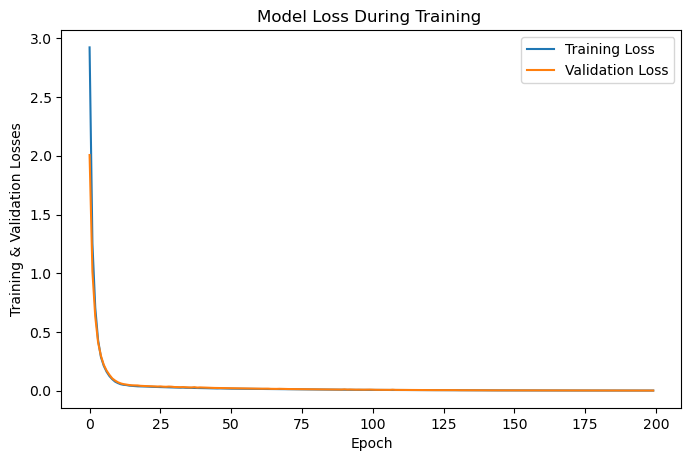

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5),dpi=100)
plt.plot(classifier_nn.history["loss"])
plt.plot(classifier_nn.history["val_loss"])

plt.title('Model Loss During Training ')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

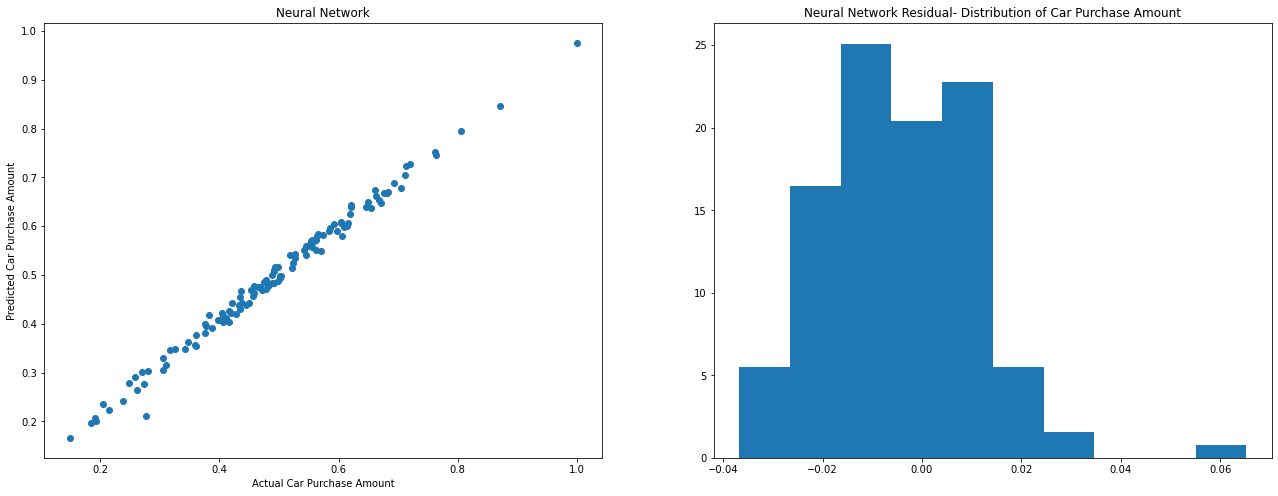

In [145]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22,8))

ax1.scatter(ytest,Ypredictedrelu);
ax1.set_title('Neural Network');
ax1.set_xlabel('Actual Car Purchase Amount');
ax1.set_ylabel('Predicted Car Purchase Amount');

ax2.set_title('Neural Network Residual- Distribution of Car Purchase Amount');
predictions=ytest-Ypredictedrelu.reshape(125,1)
ax2.hist(predictions, density=True);

### Observation from above graph
1] The Graph in the right shows that the maximum Car purchase Amount are  between -0.10 and 0.05
<br>2] The Graph in the left shows that relationship between Actual and Predicted Car purchase amount 

## Exploring regularization using Dropout technique 

In [ ]:
from keras.layers.core import Dropout


modeldrop = Sequential([
 Dense(10, input_dim=6, activation='relu'),
 Dropout(0.10),
 Dense(10,  activation='relu'),
 Dense(1, activation='linear')
 ])
modeldrop.summary()

In [165]:
modeldrop.compile(loss='mean_squared_error',optimizer='adam')

In [166]:

classifier_dnn = modeldrop.fit(xtrain,ytrain,
                    epochs=200,
                    validation_data=(xtest,ytest),
                    batch_size=15)


Epoch 1/200
25/25 [==============================] - 1s 8ms/step - loss: 301.8545 - val_loss: 152.1350
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 92.4539 - val_loss: 29.5597
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 14.5559 - val_loss: 0.3326
Epoch 4/200
25/25 [==============================] - 0s 3ms/step - loss: 3.8200 - val_loss: 0.5821
Epoch 5/200
25/25 [==============================] - 0s 3ms/step - loss: 4.2237 - val_loss: 0.2147
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 3.7702 - val_loss: 0.3187
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 3.7023 - val_loss: 0.3044
Epoch 8/200
25/25 [==============================] - 0s 3ms/step - loss: 3.4824 - val_loss: 0.4997
Epoch 9/200
25/25 [==============================] - 0s 3ms/step - loss: 2.8173 - val_loss: 0.3329
Epoch 10/200
25/25 [==============================] - 0s 4ms/step - loss: 2.7428 - val_loss: 0.2952
Ep

Epoch 83/200
25/25 [==============================] - 0s 5ms/step - loss: 0.1993 - val_loss: 0.0340
Epoch 84/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1198 - val_loss: 0.0348
Epoch 85/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1060 - val_loss: 0.0217
Epoch 86/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1429 - val_loss: 0.0262
Epoch 87/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1382 - val_loss: 0.0231
Epoch 88/200
25/25 [==============================] - 0s 3ms/step - loss: 0.1577 - val_loss: 0.0330
Epoch 89/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1102 - val_loss: 0.0235
Epoch 90/200
25/25 [==============================] - 0s 2ms/step - loss: 0.1672 - val_loss: 0.0218
Epoch 91/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0982 - val_loss: 0.0272
Epoch 92/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0947 - val_loss: 0.0346


In [169]:
Ypredicteddrop = modeldrop.predict(xtest)

4/4 [==============================] - 0s 1ms/step


In [175]:
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, precision_score, f1_score, recall_score
from prettytable import PrettyTable
perfTabled = PrettyTable(["Metrics", "Score"])
 
# Add rows
perfTabled.add_row(["Mean Squared Error for dropout model ", mean_squared_error(ytest, Ypredicteddrop)])
perfTabled.add_row(["R2 Score for dropout model", r2_score(ytest, Ypredicteddrop)])

print(perfTabled)

+---------------------------------------+----------------------+
|                Metrics                |        Score         |
+---------------------------------------+----------------------+
| Mean Squared Error for dropout model  | 0.008796248149432652 |
|       R2 Score for dropout model      |  0.6102314921678345  |
+---------------------------------------+----------------------+


In [171]:
classifier_dnn.history.keys()

dict_keys(['loss', 'val_loss'])

In [176]:
print("Loss Value at convergence for dropout model:",classifier_dnn.history["loss"][199])
print("Validation Loss Value at convergence for dropout model:",classifier_dnn.history["val_loss"][199])


Loss Value at convergence for dropout model: 0.03402361646294594
Validation Loss Value at convergence for dropout model: 0.008796244859695435


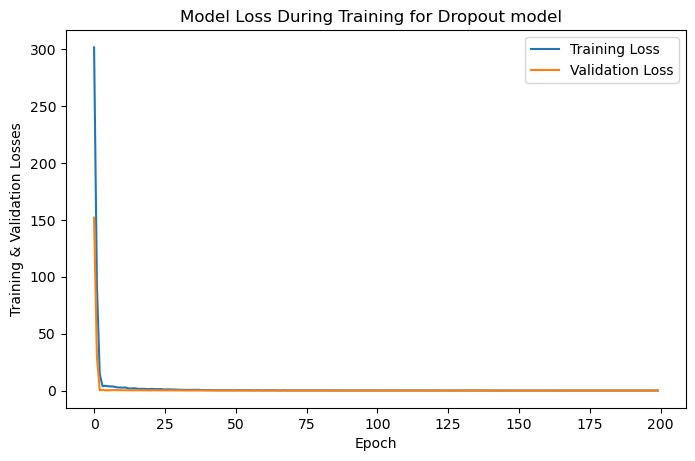

In [177]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5),dpi=100)
plt.plot(classifier_dnn.history["loss"])
plt.plot(classifier_dnn.history["val_loss"])

plt.title('Model Loss During Training for Dropout model  ')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])


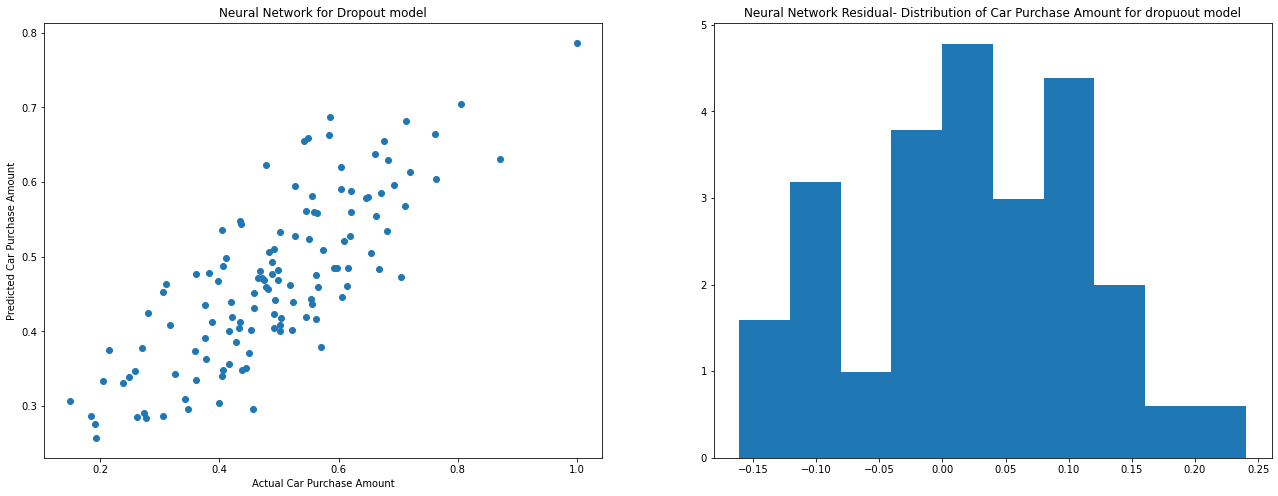

In [179]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(22,8))

ax1.scatter(ytest,Ypredicteddrop);
ax1.set_title('Neural Network for Dropout model');
ax1.set_xlabel('Actual Car Purchase Amount');
ax1.set_ylabel('Predicted Car Purchase Amount');

ax2.set_title('Neural Network Residual- Distribution of Car Purchase Amount for dropuout model');
predictiond=ytest-Ypredicteddrop.reshape(125,1)
ax2.hist(predictiond, density=True);

## Observation on Regularization using  dropout technique 
1] As the dataset is smaller, dropout technique does not seem to help much in terms of reducing loss and improving R2 score 
<br> 2] From the epoch it can be observed that the gradient descent is jittering 
<br> 3] The above observations could be due to use of smaller data set and lesser number of layers in neural network ( not complex )
<br> 4] Considering the fact that the dropout is also a hyperparameter, further tuning could result in better results 

## 8. Solution

What is the solution that is proposed to solve the business problem discussed in Section 1. Also share your learnings while working through solving the problem in terms of challenges, observations, decisions made etc.

Score 2 Marks

##---------Type the answers below this line------------------##

### Proposed Solution
In order the estimate the amount a customer would be spending for the purchase of a car, we are proposing an ANN model using multi layer perceptrons with the activation function for the hidden layers as relu and the output layer as linear. This model will be able to predict the amount based on the customer characteristics like annual Salary, credit card debt, net worth, continent, gender and age. This would enable the car businesses to estimate their sales based on the customer demographics that they serve. This will inturn enable them to target the right customers based on the category of cars they sell, hence contributing into targeted marketing strategies.

### Learnings
* Creating a multi layer persetron inorder to solve a regression problem.
* Different activation functions and the specific use cases they tend to.
* Various loss functions and the specific use cases they tend to. 
* The optimizers that can be used and where they must be used.
* Hyperparameter tuning while training the model.
* A very significant part of the learning was to clearly undertsand that the above parameters are different for Classification and Regression problems. We faced a few challenges along these lines as we were using the parameters for that of a classification problem for this use case which gave incorrect values. Detailed reading helped us understand the difference and choose the parameters best suited for this use case(regression).
* We were able to clearly observe how the loss function curve changed wheh the hyperparameters were being changed.